In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Import two data files: train.csv, test.csv
train = pd.read_csv('/Users/yuchinkong/Desktop/DataMining/train.csv')
test = pd.read_csv('/Users/yuchinkong/Desktop/DataMining/test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
#Observe how many numeric and catagory
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#Have a basic understanding of the dataset
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Data Cleaning

In [7]:
#Find null value number
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
#Find duplicated number
train.duplicated().sum()

0

In [9]:
train_test = [train, test]

### Replace null value by mathemathics method

In [10]:
for age in train_test:    
    mean = age['Age'].mean()
    age['Age'] = age
    age['Age'] = age['Age'].astype(int)

In [11]:
for data_obj in train_test:   
    data_obj['HomePlanet'] = data_obj['HomePlanet'].fillna(data_obj['HomePlanet'].mode()[0])
    data_obj['CryoSleep'] = data_obj['CryoSleep'].fillna(data_obj['CryoSleep'].mode()[0])
    data_obj['Cabin'] = data_obj['Cabin'].fillna(data_obj['Cabin'].mode()[0])
    data_obj['Destination'] = data_obj['Destination'].fillna(data_obj['Destination'].mode()[0])
    data_obj['VIP'] = data_obj['VIP'].fillna(data_obj['VIP'].mode()[0])

In [12]:
for data_num in train_test:
    data_num['RoomService'] = np.log(data_num['Spa']+1) 
    data_num['ShoppingMall'] = np.log(data_num['ShoppingMall']+1) 
    data_num['Spa'] = np.log(data_num['Spa']+1) 
    data_num['VRDeck'] = np.log(data_num['VRDeck']+1) 
    data_num['FoodCourt'] = np.log(data_num['FoodCourt']+1) 

    data_num['RoomService'] = data_num['RoomService'].fillna(data_num['RoomService'].median())
    data_num['ShoppingMall'] = data_num['ShoppingMall'].fillna(data_num['ShoppingMall'].median())
    data_num['Spa'] = data_num['Spa'].fillna(data_num['Spa'].median())
    data_num['VRDeck'] = data_num['VRDeck'].fillna(data_num['VRDeck'].median())
    data_num['FoodCourt'] = data_num['FoodCourt'].fillna(data_num['FoodCourt'].median())

In [13]:
for data_name in train_test:
    data_name.drop('Name', axis=1, inplace=True)

In [14]:
for data in train_test:
    
    data['HomePlanet'] =data['HomePlanet'].astype('category').cat.codes
    data['Destination'] =data['Destination'].astype('category').cat.codes

In [15]:
train = train.drop('Cabin', axis= 1)
test = test.drop('Cabin', axis= 1)

In [16]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

# Data Exploration

              HomePlanet  CryoSleep  Destination       Age       VIP  \
HomePlanet      1.000000   0.083586     0.034737 -0.006219  0.123512   
CryoSleep       0.083586   1.000000    -0.096287 -0.006883 -0.078281   
Destination     0.034737  -0.096287     1.000000 -0.003340 -0.044707   
Age            -0.006219  -0.006883    -0.003340  1.000000  0.013608   
VIP             0.123512  -0.078281    -0.044707  0.013608  1.000000   
RoomService    -0.005419  -0.486585    -0.005084  0.005678  0.088818   
FoodCourt      -0.042392  -0.476359    -0.054426  0.004122  0.123746   
ShoppingMall    0.092874  -0.456512     0.085545  0.013223  0.031390   
Spa            -0.005419  -0.486585    -0.005084  0.005678  0.088818   
VRDeck         -0.074241  -0.468998    -0.034662  0.008988  0.102673   
Transported     0.115461   0.460132    -0.108152  0.021491 -0.037261   

              RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
HomePlanet      -0.005419  -0.042392      0.092874 -0.005419 

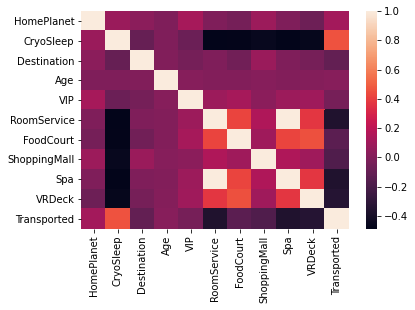

In [17]:
#See the relationship of difference metrics
print(train.corr())
sns.heatmap(train.corr())

In [18]:
train.describe().columns

Index(['HomePlanet', 'Destination', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [19]:
df_num = train[['Age','RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']]
df_cat = train[['HomePlanet','CryoSleep','Destination','VIP']]

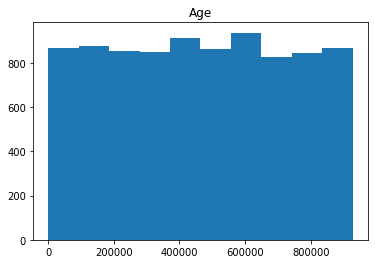

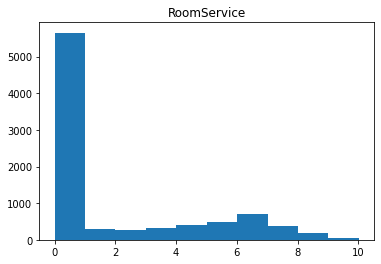

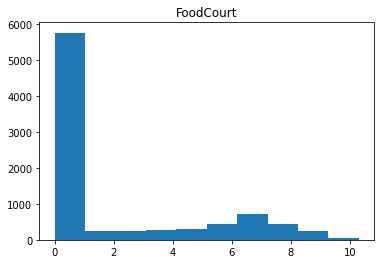

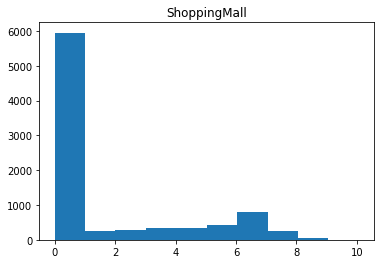

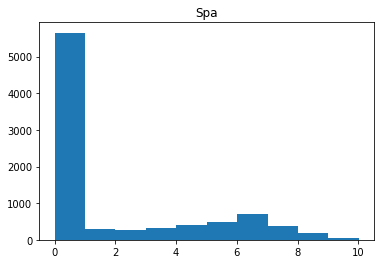

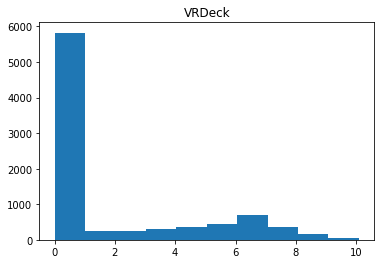

In [20]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

/Users/yuchinkong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


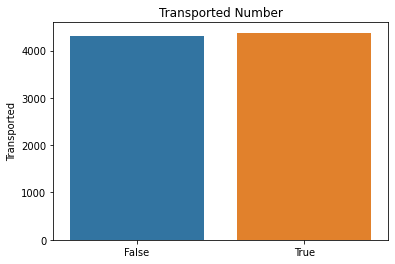

In [21]:
transport_num = train['Transported'].value_counts()
sns.barplot(transport_num.index,transport_num).set_title('Transported Number')
plt.show()

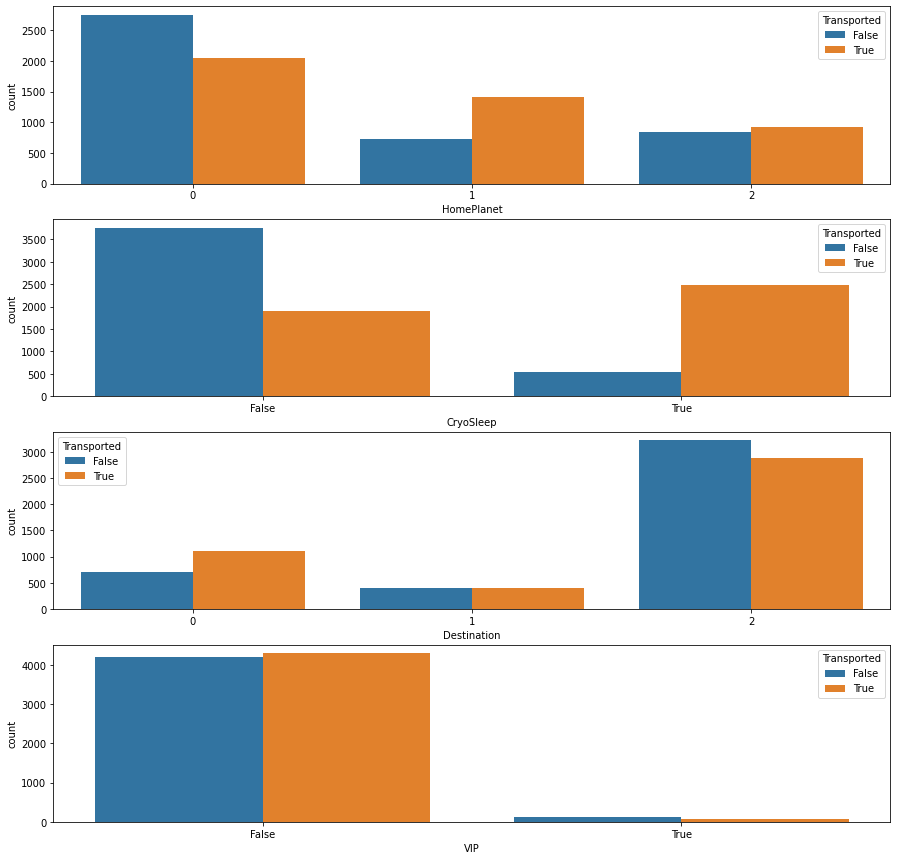

In [22]:
fig = plt.figure(figsize= (15,15))

for i, name in enumerate(df_cat):
    ax = fig.add_subplot(4, 1, i+1)
    sns.countplot(data= train, axes= ax, x= name, hue= 'Transported')

# Model

In [23]:
X = train.drop('Transported', axis=1)
y = train['Transported']
X_test = test

In [24]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,1,False,2,101,False,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,0,False,2,201,False,6.309918,2.302585,3.258097,6.309918,3.806662
2,0003_01,1,False,2,301,True,8.812248,8.182280,0.000000,8.812248,3.912023
3,0003_02,1,False,2,302,False,8.110728,7.157735,5.918894,8.110728,5.267858
4,0004_01,0,False,2,401,False,6.338594,4.262680,5.023881,6.338594,1.098612


In [25]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [26]:
X_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,True,2,1301,False,0.000000,0.000000,0.000000,0.000000,0.00000
1,0018_01,0,False,2,1801,False,7.945910,2.302585,0.000000,7.945910,0.00000
2,0019_01,1,True,0,1901,False,0.000000,0.000000,0.000000,0.000000,0.00000
3,0021_01,1,False,2,2101,False,5.204007,8.802823,0.000000,5.204007,6.37332
4,0023_01,0,False,2,2301,False,0.000000,0.000000,6.455199,0.000000,0.00000


In [27]:
print(f'X_train_training = {X.shape}')
print(f'X_test_testing = {X_test.shape}')
print(f'y_train_training = {y.shape}')

X_train_training = (8693, 11)
X_test_testing = (4277, 11)
y_train_training = (8693,)


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [31]:
def classify(model, xx, yy):
    
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state= 42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score))
    
    y_pred = model.predict(X_test)
    print('Predicted Score: ', model.score(x_test, y_test))

    y_submission = model.predict(X_test) 

In [32]:
model = GaussianNB()
classify(model, X, y)

Accuracy:  0.7021276595744681
CV Score:  0.7037872777167149
Predicted Score:  0.7021276595744681


In [33]:
model = LogisticRegression()
classify(model, X, y)

Accuracy:  0.721679125934445
CV Score:  0.7280593253930178
Predicted Score:  0.721679125934445


In [34]:
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy:  0.7147786083956297
CV Score:  0.6015311102302754
Predicted Score:  0.7147786083956297


In [35]:
model = KNeighborsClassifier()
classify(model, X, y)

Accuracy:  0.7395054629097182
CV Score:  0.6909123995576998
Predicted Score:  0.7395054629097182


In [36]:
model = RandomForestClassifier()
classify(model, X, y)

Accuracy:  0.7544565842438183
CV Score:  0.6202767883080298
Predicted Score:  0.7544565842438183


In [37]:
model = XGBClassifier()
classify(model, X, y)

Accuracy:  0.7665324899367453
CV Score:  0.5312353633657161
Predicted Score:  0.7665324899367453


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

model_rf = RandomForestClassifier(max_depth=12, min_samples_leaf=12, min_samples_split=8, n_estimators=50)
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(X_test)
print(model_rf.score(x_test, y_test))

y_submission = model_rf.predict(X_test) 

0.7688326624496837


In [39]:
submission = pd.DataFrame({
        "PassengerId": pd.read_csv('/Users/yuchinkong/Desktop/DataMining/test.csv')["PassengerId"],
        "Transported": y_submission
    })
submission.to_csv('./submission.csv', index=False)